## ToDo : 

In [2]:
# Importer les bibliothèques nécessaires

import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, confusion_matrix,accuracy_score
import numpy as np
import pandas as pd
import gc
import time
from contextlib import contextmanager
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import missingno as msno
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns
import imblearn as imb
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from sklearn.metrics import auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer
from imblearn import FunctionSampler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [3]:
!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 15.1 MB/s eta 0:00:00


In [4]:
try:
    from google.colab import drive
    drive.mount('/content/drive')
    base=pd.read_csv("/content/drive/MyDrive/Notebooks/P7/basep7.csv")
        
except ModuleNotFoundError :
    
    base = pd.read_csv("basep7.csv")
    
base = base.drop( columns = ['Unnamed: 0'])

Mounted at /content/drive


In [5]:
# one_hot_encoder classique pour les non numériques
def one_hot_encoder(base, nan_as_category = True):
    original_columns = list(base.columns)
    categorical_columns = [col for col in base.columns if base[col].dtype == 'object']
    base2 = pd.get_dummies(base, columns= categorical_columns, dummy_na= True)
    new_columns = [c for c in base.columns if c not in original_columns]
    return base2
print (base.shape)
base2 =one_hot_encoder(base)
print (base2.shape)
base = base2
del base2

(307511, 122)
(307511, 262)


In [6]:
# Remplacer les valeurs manquantes par la moyenne de la colonne
base = base.fillna(base.mean())

In [7]:
# Séparer les variables explicatives (X) et la variable cible (y)
X = base.drop("TARGET", axis=1)
y = base["TARGET"]




In [8]:
# scaler 
col_names=X.select_dtypes(include='number').columns.tolist()
features = X[col_names]
scaler = StandardScaler().fit(features.values)
features_scale = scaler.transform(features.values)
X[col_names] = features_scale
print (X.shape) 
del features
del features_scale

(307511, 261)


In [9]:
# Améliore l'affichage des DataFrame de résultats. 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

# fonction shap


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_resampled, y_resampled = RandomUnderSampler(random_state=22).fit_resample(X_train,y_train)
# entraînez votre modèle
#model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X_train, label=y_train), 100)
#model = DecisionTreeClassifier(random_state=22, max_depth = 3, min_samples_leaf = 2)
model = RandomForestClassifier(n_estimators=10, random_state=22)
model.fit(X_resampled,y_resampled)




RandomForestClassifier(n_estimators=10, random_state=22)

In [11]:
explainer = shap.Explainer(model)

In [12]:
# calculate the SHAP values for the first test observation
shap_values = explainer(X_test.iloc[0])

In [13]:
X_test.iloc[0]

SK_ID_CURR                                           7.654487e-01
CNT_CHILDREN                                        -5.775378e-01
AMT_INCOME_TOTAL                                    -1.994660e-01
AMT_CREDIT                                          -1.931625e-01
AMT_ANNUITY                                         -2.773031e-01
AMT_GOODS_PRICE                                     -2.393752e-01
REGION_POPULATION_RELATIVE                           3.993771e-01
DAYS_BIRTH                                           1.487631e+00
DAYS_EMPLOYED                                       -4.656436e-01
DAYS_REGISTRATION                                    1.329344e+00
DAYS_ID_PUBLISH                                      6.348032e-01
OWN_CAR_AGE                                          0.000000e+00
FLAG_MOBIL                                           1.803310e-03
FLAG_EMP_PHONE                                       4.686969e-01
FLAG_WORK_PHONE                                      2.003956e+00
FLAG_CONT_

In [14]:
print ( shap_values)

.values =
array([[-2.76288158e-03,  2.76288158e-03],
       [ 3.69808051e-04, -3.69808052e-04],
       [ 3.56971566e-05, -3.56971575e-05],
       [-1.21326335e-02,  1.21326335e-02],
       [-1.20011882e-03,  1.20011881e-03],
       [-1.34490771e-02,  1.34490771e-02],
       [ 4.36843389e-03, -4.36843389e-03],
       [ 2.77491684e-03, -2.77491684e-03],
       [-1.42492709e-02,  1.42492709e-02],
       [-2.66764365e-02,  2.66764365e-02],
       [-7.17751895e-03,  7.17751895e-03],
       [-7.14868153e-03,  7.14868153e-03],
       [ 0.00000000e+00,  0.00000000e+00],
       [-1.81929271e-04,  1.81929271e-04],
       [-6.22805250e-04,  6.22805249e-04],
       [-6.07371665e-06,  6.07371665e-06],
       [ 3.93809827e-03, -3.93809827e-03],
       [ 6.70767712e-05, -6.70767712e-05],
       [ 1.06825872e-04, -1.06825872e-04],
       [ 4.16136965e-04, -4.16136965e-04],
       [ 4.05557222e-04, -4.05557223e-04],
       [-1.90409289e-03,  1.90409289e-03],
       [-8.92137623e-05,  8.92137622e-05],
 

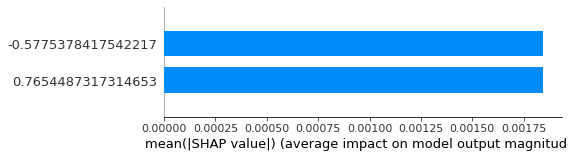

In [15]:
# Afficher les noms et les pourcentages d'importance des 10 features les plus importantes
shap.summary_plot(shap_values, X_test.iloc[0], plot_type="bar", max_display=10)

In [16]:
from scipy.special import softmax

def print_feature_importances_shap_values(shap_values, features):
    '''
    Prints the feature importances based on SHAP values in an ordered way
    shap_values -> The SHAP values calculated from a shap.Explainer object
    features -> The name of the features, on the order presented to the explainer
    '''
    # Calculates the feature importance (mean absolute shap value) for each feature
    importances = []
    for i in range(shap_values.values.shape[1]):
        importances.append(np.mean(np.abs(shap_values.values[:, i])))
    # Calculates the normalized version
    importances_norm = softmax(importances)
    # Organize the importances and columns in a dictionary
    feature_importances = {fea: imp for imp, fea in zip(importances, features)}
    feature_importances_norm = {fea: imp for imp, fea in zip(importances_norm, features)}
    # Sorts the dictionary
    feature_importances = {k: v for k, v in sorted(feature_importances.items(), key=lambda item: item[1], reverse = True)}
    feature_importances_norm= {k: v for k, v in sorted(feature_importances_norm.items(), key=lambda item: item[1], reverse = True)}
    # Prints the feature importances
    for k, v in feature_importances.items():
        print(f"{k} -> {v:.4f} (softmax = {feature_importances_norm[k]:.4f})")

TypeError: ignored

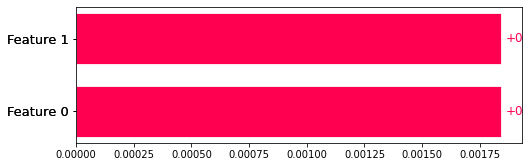

In [17]:
shap.plots.bar(shap_values)

In [ ]:
shap.summary_plot(shap_values)

In [ ]:
shap.plots.beeswarm(shap_values)

In [ ]:
shap.summary_plot(shap_values, plot_type='violin')

In [ ]:
shap.plots.bar(shap_values[0])

In [ ]:
shap.plots.waterfall(shap_values[0])

In [ ]:
shap.plots.force(shap_values[0])

In [ ]:
import shap
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Charger les données
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Diviser les données en ensembles de formation et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=22)

# Créer un modèle de forêt aléatoire
model = RandomForestClassifier(random_state=22)
model.fit(X_train, y_train)

# Créer un explainer de type TreeExplainer
explainer = shap.TreeExplainer(model)

# Calculer les valeurs SHAP pour un échantillon de test donné
shap_values = explainer.shap_values(X_test.iloc[[0]])

# Afficher les noms et les pourcentages d'importance des 10 features les plus importantes
shap.summary_plot(shap_values, X_test.iloc[[0]], plot_type="bar", max_display=10)


In [ ]:
# display the SHAP values
print("SHAP values:")
for i in range(X_test.shape[1]):
    print(f"{X_test.columns[i]:<8} SHAP value: {shap_values[0][0][i]:.3f}")

In [ ]:


# Afficher les résultats
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], X[0,:])


In [ ]:
import shap
from sklearn.ensemble import RandomForestClassifier

# Charger les données
X,y = shap.datasets.iris()

# Créer un modèle de forêt aléatoire
model = RandomForestClassifier()

# Entraîner le modèle sur les données
model.fit(X, y)

# Créer un explainer de type TreeExplainer
explainer = shap.TreeExplainer(model)

# Calculer les valeurs SHAP pour un individu spécifique
ind = 0
shap_values = explainer.shap_values(X[ind,:])

# Afficher les résultats
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], X[ind,:])


In [ ]:
# expliquez les prédictions du modèle avec SHAP

#shap_values = shap.TrExplainer(model).shap_values(x_train)
#classifier = transformers.pipeline('sentiment-analysis', return_all_scores=True)
#classifier(short_data[:2])

#model.predict_proba(X_train)[:0]




shap_values = explainer(X_test)

# approximate the interaction values
approx_interactions = shap.approximate_interactions(model.predict, X_test, nsamples=100)

# visualize the interaction values for the first test observation
shap.interaction_plot(0, approx_interactions[0], X_test.iloc[0])


# visualize the Shapley values for the first test observation
# shap.waterfall_plot(explainer.expected_value[0], shap_values[0][0], X_test.iloc[0])


"""
explainer = shap.Explainer(model)
shap_values = explainer(X_resampled)

# visualisez les valeurs de Shapley pour la première observation de test
shap.waterfall_plot(explainer.base_values[0], values[0], X[0])

#shap.plots.waterfall(shap_values[0])
shap.waterfall_plot(explainer.base_values[0], values[0][0], X[0])
"""

In [ ]:
""" reg = RandomForestRegressor(random_state=22,max_depth =7, min_samples_split= 3, min_samples_leaf=1,n_estimators=100)
skf = StratifiedKFold(n_splits=5, shuffle=True,random_state=22 )
for train_index, test_index in skf.split(X, buildingnr['log_SiteEnergyUse(kBtu)_class']):
    x_train_fold, x_test_fold = X.iloc[train_index] , X.iloc[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    reg.fit(x_train_fold, y_train_fold)

    import shap
shap_values = shap.TreeExplainer(reg).shap_values(x_train_fold)
shap.summary_plot(shap_values, x_train_fold, plot_type="bar")

explainer = shap.Explainer(reg.predict, x_test_fold)
# Calculates the SHAP values - It takes some time
shap_values = explainer(x_test_fold)"""

In [ ]:
def comp_algos(X,y,algos,params,cvi,scorer,sampling) : 

    
    roc_aucs = []
    confusions = []
    Report_df = pd.DataFrame(columns=['Algorithme', 'score nom ','score']) 
    Append = []

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #random_state ? 
    
    # Apply oversampling
    #ros = RandomOverSampler(random_state=42)
    #X_resampled, y_resampled = sampling.fit_resample(X_train,y_train)
    
    for i in range(len(algos)): 
        
        #faire boucle sur le sampling 
        for s in range(len(sampling)): 
            
            # Apply sampling
            
            debut = time.time()
            X_resampled, y_resampled = sampling[s].fit_resample(X_train,y_train)

# Créer un objet GridSearchCV qui va comparer les performances des algorithmes sur les données en utilisant le score roc_auc comme critère d'évaluation 
            print (algos[i], params[i] )
    
          
           
            grid = GridSearchCV(estimator=algos[i], param_grid=params[i], scoring=scorer, cv=cvi, refit= True )
          
            grid.fit(X_resampled,y_resampled)
            del X_resampled
            del y_resampled

# Afficher le meilleur score et le meilleur algorithme trouvé par GridSearchCV 
            print("Meilleur score:", grid.best_score_)
            print("Meilleur algorithme:", grid.best_estimator_)
            #print ( "cv results ;", grid.cv_results_ ) 
            print ( "best_params_",grid.best_params_)
            print ("best_index_",grid.best_index_)
            print ("scorer_",grid.scorer_)
            print ("n_splits_",grid.n_splits_)
            print ("sampling method",sampling[s])
    
            cv_result= pd.DataFrame(grid.cv_results_)
            display ( cv_result )

# Prédire les classes pour chaque algorithme 
            pred_y_train = grid.predict(X_train)
            score = accuracy_score(y_train,pred_y_train)
            print ('accuracy train',score)
          
            roc_auc_train = roc_auc_score(y_train, pred_y_train)
            #print ( 'roc_auc_train',roc_auc_train)
            print(f'roc_auc_train: {roc_auc_train:.1%}')

            pred_y_train_proba=grid.predict_proba(X_train)[:,1]
            roc_auc_discret_train = roc_auc_score(y_train, pred_y_train_proba)
            print( "Roc auc train predict proba",roc_auc_discret_train)
        
            pred_y_test = grid.predict(X_test)
            score = accuracy_score(y_test,pred_y_test)
            print ('accuracy test',score)
          
            roc_auc_test = roc_auc_score(y_test, pred_y_test)
            print ( 'roc_auc_ test ',roc_auc_test)

            pred_y_test_proba=grid.predict_proba(X_test)[:,1]
            roc_auc_discret_test= roc_auc_score(y_test, pred_y_test_proba)
            print( "Roc auc score test predict proba",roc_auc_discret_test)

# Calculer la matrice de confusion pour chaque algorithme

            matrice_confusion = confusion_matrix(y_true=y_train,y_pred=pred_y_train)
            tn, fp, fn, tp = confusion_matrix(y_true=y_train,y_pred=pred_y_train, normalize='all').ravel()

# Change figure size and increase dpi for better resolution
            plt.figure(figsize=(2,1), dpi=100)
# Scale up the size of all text
            sns.set(font_scale = 1)

# Plot Confusion Matrix using Seaborn heatmap()
# Parameters:
# first param - confusion matrix in array format   
# annot = True: show the numbers in each heatmap cell
# fmt = 'd': show numbers as integers. 
            ax = sns.heatmap(matrice_confusion, annot=True, fmt='d', )

# set x-axis label and ticks. 
            ax.set_xlabel("Prédiction ", fontsize=14, labelpad=20)
            ax.xaxis.set_ticklabels(['Accepté', 'Refus'])

# set y-axis label and ticks
            ax.set_ylabel("réel ", fontsize=14, labelpad=20)
            ax.yaxis.set_ticklabels(['Accepté', 'Refus'])

# set plot title
            titre = str(algos[i])
            ax.set_title(titre, fontsize=14, pad=20)
            plt.show()    
     
    
#graphique

            roc_auc_courbe = roc_auc_score(y_train, pred_y_train_proba)
            print ('roc auc courbe',roc_auc_courbe)
            fpr,tpr,_= roc_curve(y_train,pred_y_train_proba)
    
            plt.plot(fpr,tpr,label ='score (auc roc = %0.2f)' % roc_auc_courbe)
            plt.plot([0,1],[0,1],'k--',label ="random")
            plt.xlabel('Taux faux positifs')
            plt.ylabel('Taux vrais positifs')
            plt.title('ROC curve '+titre)
            plt.legend(loc = 'lower right')
            plt.show()
            
           
            
            # Créer un dataframe pandas qui contient les résultats de chaque algorithme
            print(' score ', scorer,':' ,grid.best_score_)
            duration = (time.time() - debut )/60
            print (duration ,'minutes')
            Append = pd.DataFrame([[ algos[i],grid.best_params_,scorer ,grid.best_score_,sampling[s],roc_auc_train,roc_auc_discret_train
                                    ,roc_auc_test,roc_auc_discret_test,tn,fp,fn,tp,duration]]
                                  ,columns=['Algorithme','Meilleur param', 'score nom ','best score','sampling','roc_auc_train'
                                            ,'Roc_auc_train_discret','roc_auc_test','roc_auc_discret_test','TN','FP','FN','TP','minutes'])
            Report_df = pd.concat([Report_df, Append]) 
            
    return Report_df

In [ ]:
def nosamplerfunc(X, y):
    return X[:], y[:]
nosampler = FunctionSampler(func=nosamplerfunc)

# test de base , scorer roc auc

In [ ]:
algos = [ LogisticRegression(random_state=22),DecisionTreeClassifier(random_state=22), RandomForestClassifier(random_state=22), 
         XGBClassifier(random_state=22), GaussianNB(),DummyClassifier()]

# Définir une grille de paramètres à optimiser pour chaque algorithme
params = [
    
    {"C": [0.01, 0.1, 1, 10], "penalty": ["l1", "l2", "elasticnet", 'none']}, # pour LogisticRegression 
    {"max_depth": [3, 5, 7], "min_samples_leaf": [5, 10, 15]}, # pour DecisionTreeClassifier
    {"n_estimators": [100, 200], "max_depth": [3, 5]}, # pour RandomForestClassifier 
    {"n_estimators": [100, 200], "learning_rate": [0.01, 0.1]}, # pour XGBClassifier 
    {} ,# pas de paramètres à optimiser pour GaussianNB 
    {"strategy": ["most_frequent","prior","stratified","uniform"]}, # pour DummyClassifier
] 

"""
algos = [ DecisionTreeClassifier(random_state=22)]
params = [ {"max_depth": [2], "min_samples_leaf": [3]}] # pour DecisionTreeClassifier
"""

cvi =2
scorer = "roc_auc" 


sampling = [nosampler, RandomOverSampler(random_state=22),RandomUnderSampler(random_state=22),SMOTETomek(random_state=22)]



#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
result_auc= comp_algos(X,y,algos,params,cvi,scorer,sampling)

result_auc.to_excel("resultat_auc_200323.xlsx")


In [ ]:

formatted_time = time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(time.time()))
nom_excel='result_auc_'+ formatted_time +'.xlsx'
result_auc.to_excel(nom_excel)

# test avec scorer métier 

In [ ]:
""" algos = [ LogisticRegression(random_state=22),DecisionTreeClassifier(random_state=22), RandomForestClassifier(random_state=22), 
         XGBClassifier(random_state=22), GaussianNB(),DummyClassifier()]

# Définir une grille de paramètres à optimiser pour chaque algorithme
params = [
    
    {"C": [0.01, 0.1, 1, 10], "penalty": ["l1", "l2", "elasticnet", None]}, # pour LogisticRegression ‘l1’, ‘l2’, ‘elasticnet’, None
    {"max_depth": [3, 5, 7], "min_samples_leaf": [5, 10, 15]}, # pour DecisionTreeClassifier
    {"n_estimators": [100, 200], "max_depth": [3, 5]}, # pour RandomForestClassifier 
    {"n_estimators": [100, 200], "learning_rate": [0.01, 0.1]}, # pour XGBClassifier 
    {} ,# pas de paramètres à optimiser pour GaussianNB 
    {"strategy": ["most_frequent","prior","stratified","uniform"]}, # pour DummyClassifier
]
"""
cvi =2

algos = [ DecisionTreeClassifier(random_state=22)]
params = [ {"max_depth": [2,3], "min_samples_leaf": [2,5]}] # pour DecisionTreeClassifier

def custom_score_func(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    score = tp + tn - fp -( 10 * fn)
    #score 2 = tp + (10 * tn )- fp -(10 * fn)
    return score

# Création du scorer personnalisé
score_metier= make_scorer(custom_score_func)

scorer = score_metier

sampling = [nosampler, RandomOverSampler(random_state=22),RandomUnderSampler(random_state=22),SMOTETomek(random_state=22)]



result_metier= comp_algos(X,y,algos,params,cvi,scorer,sampling)
result_metier

In [ ]:
result_metier.to_excel("result_metier_190323.xlsx")

# Shap feature importante

In [ ]:
import shap

In [ ]:
reg = RandomForestRegressor(random_state=22,max_depth =7, min_samples_split= 3, min_samples_leaf=1,n_estimators=100)
skf = StratifiedKFold(n_splits=5, shuffle=True,random_state=22 )
for train_index, test_index in skf.split(X, buildingnr['log_SiteEnergyUse(kBtu)_class']):
    x_train_fold, x_test_fold = X.iloc[train_index] , X.iloc[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    reg.fit(x_train_fold, y_train_fold)

    import shap
shap_values = shap.TreeExplainer(reg).shap_values(x_train_fold)
shap.summary_plot(shap_values, x_train_fold, plot_type="bar")

explainer = shap.Explainer(reg.predict, x_test_fold)
# Calculates the SHAP values - It takes some time
shap_values = explainer(x_test_fold)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_resampled, y_resampled = RandomUnderSampler(random_state=22).fit_resample(X_train,y_train)
# entraînez votre modèle
#model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X_train, label=y_train), 100)
#model = DecisionTreeClassifier(random_state=22, max_depth = 3, min_samples_leaf = 2)
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_resampled,y_resampled)


# expliquez les prédictions du modèle avec SHAP

#shap_values = shap.TrExplainer(model).shap_values(x_train)
#classifier = transformers.pipeline('sentiment-analysis', return_all_scores=True)
#classifier(short_data[:2])
model.predict_proba(X_train)[:0]

explainer = shap.Explainer(model)
shap_values = explainer(X_resampled)

# visualisez les valeurs de Shapley pour la première observation de test
shap.waterfall_plot(explainer.base_values[0], values[0], X[0])

#shap.plots.waterfall(shap_values[0])
shap.waterfall_plot(explainer.base_values[0], values[0][0], X[0])

# unbalanced  oversampling score roc auc 

In [ ]:
algos = [ LogisticRegression(random_state=22),DecisionTreeClassifier(random_state=22), RandomForestClassifier(random_state=22), XGBClassifier(random_state=22), GaussianNB(),DummyClassifier()]

# Définir une grille de paramètres à optimiser pour chaque algorithme
params = [
    
    {"C": [0.01, 0.1, 1, 10], "penalty": ["l1", "l2", "elasticnet", None]}, # pour LogisticRegression ‘l1’, ‘l2’, ‘elasticnet’, None
    {"max_depth": [3, 5, 7], "min_samples_leaf": [5, 10, 15]}, # pour DecisionTreeClassifier
    {"n_estimators": [100, 200], "max_depth": [3, 5]}, # pour RandomForestClassifier 
    {"n_estimators": [100, 200], "learning_rate": [0.01, 0.1]}, # pour XGBClassifier 
    {} ,# pas de paramètres à optimiser pour GaussianNB 
    {"strategy": ["most_frequent","prior","stratified","uniform"]}, # pour DummyClassifier
]

cvi =2
scorer = "roc_auc"

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Apply oversampling
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train,y_train)


comp_algos(X_resampled,y_resampled,X_test,y_test,algos,params,cvi,scorer)


# Nouvelle section

# Nouvelle section

# unbalanced  oversampling score métier 1 

In [ ]:
algos = [ LogisticRegression(random_state=22),DecisionTreeClassifier(random_state=22), RandomForestClassifier(random_state=22), XGBClassifier(random_state=22), GaussianNB(),DummyClassifier()]

# Définir une grille de paramètres à optimiser pour chaque algorithme
params = [
    
    {"C": [0.01, 0.1, 1, 10], "penalty": ["l1", "l2", "elasticnet", None]}, # pour LogisticRegression ‘l1’, ‘l2’, ‘elasticnet’, None
    {"max_depth": [3, 5, 7], "min_samples_leaf": [5, 10, 15]}, # pour DecisionTreeClassifier
    {"n_estimators": [100, 200], "max_depth": [3, 5]}, # pour RandomForestClassifier 
    {"n_estimators": [100, 200], "learning_rate": [0.01, 0.1]}, # pour XGBClassifier 
    {} ,# pas de paramètres à optimiser pour GaussianNB 
    {"strategy": ["most_frequent","prior","stratified","uniform"]}, # pour DummyClassifier
]

cvi =2

def custom_score_func(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    score = tp + tn - fp -( 10 * fn)
    #score 2 tp + (10 * tn )- fp -(10 * fn)
    return score

# Création du scorer personnalisé
scorer = make_scorer(custom_score_func)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Apply oversampling
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train,y_train)


#comp_algos(X_resampled,y_resampled,X_test,y_test,algos,params,cvi,scorer)
comp_algos(X,y,algos,params,cvi,scorer,sampling)

# undersampling  roc auc

In [ ]:
algos = [ LogisticRegression(random_state=22),DecisionTreeClassifier(random_state=22), RandomForestClassifier(random_state=22), XGBClassifier(random_state=22), GaussianNB(),DummyClassifier()]

# Définir une grille de paramètres à optimiser pour chaque algorithme
params = [
    
    {"C": [0.01, 0.1, 1, 10], "penalty": ["l1", "l2", "elasticnet", None]}, # pour LogisticRegression ‘l1’, ‘l2’, ‘elasticnet’, None
    {"max_depth": [3, 5, 7], "min_samples_leaf": [5, 10, 15]}, # pour DecisionTreeClassifier
    {"n_estimators": [100, 200], "max_depth": [3, 5]}, # pour RandomForestClassifier 
    {"n_estimators": [100, 200], "learning_rate": [0.01, 0.1]}, # pour XGBClassifier 
    {} ,# pas de paramètres à optimiser pour GaussianNB 
    {"strategy": ["most_frequent","prior","stratified","uniform"]}, # pour DummyClassifier
]

cvi =2
scorer = "roc_auc"

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Apply undersampling
rus = RandomUnderSampler(random_state=22)
X_resampled, y_resampled = rus.fit_resample(X_train,y_train)


comp_algos(X_resampled,y_resampled,X_test,y_test,algos,params,cvi,scorer)

# undersampling score metier 1

In [ ]:
algos = [ LogisticRegression(random_state=22),DecisionTreeClassifier(random_state=22), RandomForestClassifier(random_state=22), XGBClassifier(random_state=22), GaussianNB(),DummyClassifier()]

# Définir une grille de paramètres à optimiser pour chaque algorithme
params = [
    
    {"C": [0.01, 0.1, 1, 10], "penalty": ["l1", "l2", "elasticnet", None]}, # pour LogisticRegression ‘l1’, ‘l2’, ‘elasticnet’, None
    {"max_depth": [3, 5, 7], "min_samples_leaf": [5, 10, 15]}, # pour DecisionTreeClassifier
    {"n_estimators": [100, 200], "max_depth": [3, 5]}, # pour RandomForestClassifier 
    {"n_estimators": [100, 200], "learning_rate": [0.01, 0.1]}, # pour XGBClassifier 
    {} ,# pas de paramètres à optimiser pour GaussianNB 
    {"strategy": ["most_frequent","prior","stratified","uniform"]}, # pour DummyClassifier
]

cvi =2

def custom_score_func(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    score = tp + tn - fp -( 10 * fn)
    #score 2 tp + (10 * tn )- fp -(10 * fn)
    return score

# Création du scorer personnalisé
scorer = make_scorer(custom_score_func)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Apply undersampling
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X_train,y_train)


comp_algos(X_resampled,y_resampled,X_test,y_test,algos,params,cvi,scorer)

# Unbalanced SMOTE roc auc

In [ ]:
algos = [ LogisticRegression(random_state=22),DecisionTreeClassifier(random_state=22), RandomForestClassifier(random_state=22), XGBClassifier(random_state=22), GaussianNB(),DummyClassifier()]

# Définir une grille de paramètres à optimiser pour chaque algorithme
params = [
    
    {"C": [0.01, 0.1, 1, 10], "penalty": ["l1", "l2", "elasticnet", None]}, # pour LogisticRegression ‘l1’, ‘l2’, ‘elasticnet’, None
    {"max_depth": [3, 5, 7], "min_samples_leaf": [5, 10, 15]}, # pour DecisionTreeClassifier
    {"n_estimators": [100, 200], "max_depth": [3, 5]}, # pour RandomForestClassifier 
    {"n_estimators": [100, 200], "learning_rate": [0.01, 0.1]}, # pour XGBClassifier 
    {} ,# pas de paramètres à optimiser pour GaussianNB 
    {"strategy": ["most_frequent","prior","stratified","uniform"]}, # pour DummyClassifier
]

cvi =2
scorer = "roc_auc"

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Apply SMOTE
smote = SMOTETomek(random_state=0)
X_resampled, y_resampled = smote.fit_resample(X_train,y_train)

comp_algos(X_resampled,y_resampled,X_test,y_test,algos,params,cvi,scorer)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Unbalanced SMOTE métier 1

In [ ]:
algos = [ LogisticRegression(random_state=22),DecisionTreeClassifier(random_state=22), RandomForestClassifier(random_state=22), XGBClassifier(random_state=22), GaussianNB(),DummyClassifier()]

# Définir une grille de paramètres à optimiser pour chaque algorithme
params = [
    
    {"C": [0.01, 0.1, 1, 10], "penalty": ["l1", "l2", "elasticnet", None]}, # pour LogisticRegression ‘l1’, ‘l2’, ‘elasticnet’, None
    {"max_depth": [3, 5, 7], "min_samples_leaf": [5, 10, 15]}, # pour DecisionTreeClassifier
    {"n_estimators": [100, 200], "max_depth": [3, 5]}, # pour RandomForestClassifier 
    {"n_estimators": [100, 200], "learning_rate": [0.01, 0.1]}, # pour XGBClassifier 
    {} ,# pas de paramètres à optimiser pour GaussianNB 
    {"strategy": ["most_frequent","prior","stratified","uniform"]}, # pour DummyClassifier
]

cvi =2

def custom_score_func(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    score = tp + tn - fp -( 10 * fn)
    #score 2 tp + (10 * tn )- fp -(10 * fn)
    return score

# Création du scorer personnalisé
scorer = make_scorer(custom_score_func)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Apply SMOTE
smote = SMOTETomek(random_state=0)
X_resampled, y_resampled = smote.fit_resample(X_train,y_train)

comp_algos(X_resampled,y_resampled,X_test,y_test,algos,params,cvi,scorer)

# individuel

In [ ]:
#LogisticRegression() {'C': 1, 'penalty': 'l2'} 
grid = GridSearchCV(estimator=algos[i], param_grid=params[i], scoring="roc_auc", cv=3, refit= True )

In [ ]:

nsplit = 3
    
    
debut = time.time()



estimator = DecisionTreeClassifier(max_depth=7, min_samples_leaf=15)

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])  

clf = Pipeline(steps=[ #('preprocessor', numeric_transformer),
                      ('estimator', estimator) ])


skf = StratifiedKFold(n_splits=nsplit, shuffle=True,random_state=22 ) 


for train_index, test_index in skf.split(X, y):
    x_train, x_test = X.iloc[train_index] , X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf.fit(x_train, y_train) 

    
#c faire tourner le prédict
pred_y = clf.predict(x_test)
score = accuracy_score(y_test,pred_y)
print ('accuracy test ',score)
roc_auc = roc_auc_score(y_test, pred_y)
print ( 'roc_auc_  test ',roc_auc)


pred_y_train = clf.predict(x_train)
score = accuracy_score(y_train,pred_y_train)
print ('accuracy train ',score)
roc_auc = roc_auc_score(y_train, pred_y_train)
print ( 'roc_auc_  train ',roc_auc)

In [ ]:

nsplit = 3
    
    
debut = time.time()

grid = GridSearchCV(estimator=DecisionTreeClassifier(), 
                                param_grid={"max_depth": [3, 5, 7], "min_samples_leaf": [5, 10, 15]}, scoring="roc_auc", cv=3, refit= True )


grid.fit(X,y)

# Afficher le meilleur score et le meilleur algorithme trouvé par GridSearchCV 
print("Meilleur score:", grid.best_score_)
print("Meilleur algorithme:", grid.best_estimator_)




In [ ]:
from sklearn.metrics import auc
from sklearn.model_selection import train_test_split
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit GridSearchCV on training data
grid = GridSearchCV(estimator=DecisionTreeClassifier(), 
                    param_grid={"max_depth": [3, 5, 7], "min_samples_leaf": [5, 10, 15]}, 
                    scoring="roc_auc", cv=3)
grid.fit(X_train,y_train)

# Make predictions on test data using best_estimator_
y_pred = grid.best_estimator_.predict_proba(X_test)[:,1]

# Calculate FPR and TPR
fpr, tpr, thresholds = roc_curve(y_test,y_pred)

# Calculate AUC
roc_auc = auc(fpr,tpr)

# Plot ROC curve
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
grid = GridSearchCV(estimator=DecisionTreeClassifier, param_grid={"max_depth": [3, 5, 7], "min_samples_leaf": [5, 10, 15]}, scoring="roc_auc", cv=3, refit= True )

In [ ]:

      
    
    
    
""" Append= pd.DataFrame([['RandomForest' , 
                        np.around (mean_squared_error(y_test,reg.predict(x_test)),3),
                       np.around (mean_squared_error(y_test,reg.predict(x_test),squared=False),3),
                      np.around(r2_score(y_test,reg.predict(x_test)),3),
                     np.around( mean_absolute_percentage_error(y_test,reg.predict(x_test)),3),
                      np.around(r2_score(y_train,reg.predict(x_train)),3) ,
                      time.time() - debut]], 
                     columns=['méthode', 'MSE','RMSE','R2 Test','MA%E','R2 Train','Durée'])
    

Report = pd.concat([Report, Append]) 
Report""" 
    

In [ ]:


# Calculer le score roc_auc pour chaque algorithme 
    roc_aucs = []
    for i in range(len(algos)):
        roc_aucs.append(roc_auc_score(y_true=y,y_score=probas[:,i]))

# Créer un dataframe pandas qui contient les scores roc_auc de chaque algorithme 
    roc_df = pd.DataFrame({"Algorithme": algos,"ROC_AUC": roc_aucs})
    print(roc_df)

# Prédire les classes pour chaque algorithme 
    preds = grid.predict(X)

# Calculer la matrice de confusion pour chaque algorithme 
    confusions = []
    for i in range(len(algos)):
        confusions.append(confusion_matrix(y_true=y,y_pred=preds[:,i]))

# Créer un dataframe pandas qui contient les matrices de confusion de chaque algorithme 
    conf_df = pd.DataFrame({"Algorithme": algos,"Confusion Matrix": confusions})
    print(conf_df)

In [ ]:
# Importer la bibliothèque Keras Tuner qui permet de faire de l'optimisation bayésienne
from kerastuner.tuners import BayesianOptimization

# Définir une fonction qui crée un modèle de classification naïve bayésienne avec des hyperparamètres à optimiser
def build_model(hp):
    # Créer un objet GaussianNB 
    model = GaussianNB()
    # Définir les hyperparamètres à optimiser: le lissage de Laplace (var_smoothing) et le seuil de décision (threshold)
    hp_var_smoothing = hp.Float('var_smoothing', 1e-9, 1e-3, sampling='log')
    hp_threshold = hp.Float('threshold', 0.0, 1.0)
    # Affecter les valeurs des hyperparamètres au modèle 
    model.var_smoothing = hp_var_smoothing
    model.threshold = hp_threshold
    # Retourner le modèle 
    return model

# Créer un objet BayesianOptimization qui va comparer les performances du modèle sur les données en utilisant le score roc_auc comme critère d'évaluation 
tuner = BayesianOptimization(build_model,
                             objective='roc_auc',
                             max_trials=10,
                             executions_per_trial=1)

# Lancer la recherche des meilleurs hyperparamètres pour le modèle 
tuner.search(X,y)

# Afficher les meilleurs hyperparamètres trouvés par BayesianOptimization 
print("Meilleurs hyperparamètres:", tuner.get_best_hyperparameters()[0].values)

# Prédire les probabilités des classes pour le modèle optimisé 
proba_bayes = tuner.predict(X)

# Calculer le score roc_auc pour le modèle optimisé 
roc_auc_bayes = roc_auc_score(y_true=y,y_score=proba_bayes)

# Ajouter le score roc_auc du modèle optimisé au dataframe pandas qui contient les scores roc_auc de chaque algorithme 
roc_df.loc[len(roc_df)] = ["GaussianNB Optimized", roc_auc_bayes]
print(roc_df)

# Prédire les classes pour le modèle optimisé 
pred_bayes = tuner.predict_classes(X)

# Calculer la matrice de confusion pour le modèle optimisé 
confusion_bayes = confusion_matrix(y_true=y,y_pred=pred_bayes)

# Ajouter la matrice de confusion du modèle optimisé au dataframe pandas qui contient les matrices de confusion de chaque algorithme 
conf_df.loc[len(conf_df)] = ["GaussianNB Optimized", confusion_bayes]
print(conf_df)

In [ ]:
# Importer la bibliothèque matplotlib.pyplot qui permet de faire des graphiques 
import matplotlib.pyplot as plt

# Créer une figure avec une taille de 10x10 pouces 
plt.figure(figsize=(10,10))

# Parcourir chaque algorithme dans le dataframe roc_df qui contient les scores roc_auc de chaque algorithme 
for index, row in roc_df.iterrows():
    # Récupérer le nom de l'algorithme et le score roc_auc 
    algo = row["Algo"]
    score = row["ROC_AUC"]
    # Calculer les taux de faux positifs (fpr) et de vrais positifs (tpr) en utilisant la fonction roc_curve de sklearn.metrics 
    fpr, tpr, thresholds = roc_curve(y_true=y,y_score=proba_dict[algo])
    # Tracer la courbe ROC en utilisant la fonction plot de matplotlib.pyplot 
    plt.plot(fpr,tpr,label=f"{algo} (AUC={score:.3f})")

# Ajouter un titre au graphique 
plt.title("Courbes ROC des différents algorithmes")

# Ajouter des légendes aux axes x et y 
plt.xlabel("Taux de faux positifs")
plt.ylabel("Taux de vrais positifs")

# Ajouter une grille au graphique pour faciliter la lecture 
plt.grid()

# Ajouter une ligne diagonale qui représente un classifieur aléatoire 
plt.plot([0,1],[0,1],linestyle="--",color="black",label="Aléatoire")

# Ajouter une légende au graphique pour identifier chaque courbe ROC 
plt.legend()

# Afficher le graphique à l'écran 
plt.show()


Les courbes ROC permettent d’évaluer les performances d’un modèle de classification en fonction du seuil de décision choisi. Elles représentent le taux de vrais positifs (TPR) en fonction du taux de faux positifs (FPR) pour différents seuils. Plus la courbe est proche du coin supérieur gauche du graphique, plus le modèle est performant. L’aire sous la courbe (AUC) est une mesure synthétique qui résume la qualité d’un modèle: plus elle est proche de 1, mieux c’est.

Sur ce graphique, on peut voir que le modèle optimisé par l’optimisation bayésienne a la meilleure performance parmi tous les modèles testés. Il a une AUC élevée et il domine les autres courbes sur tout l’intervalle des FPR. Cela signifie qu’il a un bon compromis entre sensibilité et spécificité.

In [ ]:
# Importer les bibliothèques nécessaires
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
import pandas as pd

# Créer un dataframe pandas avec les étiquettes réelles et les probabilités prédites
y_true = [0, 0, 0, 1, 1, 1]
y_pred = [0.1, 0.2, 0.3, 0.7, 0.8, 0.9]
df = pd.DataFrame({"y_true": y_true,"y_pred": y_pred})

# Calculer les taux de faux positifs et de vrais positifs pour chaque classe
fpr_0,tpr_0,_ = roc_curve(y_true=df["y_true"],y_score=1-df["y_pred"],pos_label=0)
fpr_1,tpr_1,_ = roc_curve(y_true=df["y_true"],y_score=df["y_pred"],pos_label=1)

# Créer un objet FacetGrid avec seaborn
g = sns.FacetGrid(df,hue="y_true",height=5)

# Appliquer la fonction plot à chaque sous-graphique avec la méthode map
g.map(plt.plot,fpr_0,tpr_0,label="Classe 0")
g.map(plt.plot,fpr_1,tpr_1,label="Classe 1")

# Ajouter des titres, des légendes et des annotations au graphique
g.set_axis_labels("Taux de faux positifs","Taux de vrais positifs")
g.fig.suptitle("Courbes ROC avec seaborn")
g.add_legend()
plt.plot([0,1],[0,1],linestyle="--",color="black",label="Aléatoire")
plt.show()

# 